# Housing Price Prediction
![alt text](https://miro.medium.com/max/402/1*2foyXif7hwkO8wWB5T9KtQ.png)

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import pickle
sns.set()

# Load Boston Dataset

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['MEDV'] = boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [79]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [80]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [82]:
bos.shape

(506, 14)

In [83]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Let's create some simple plots to check out the data!

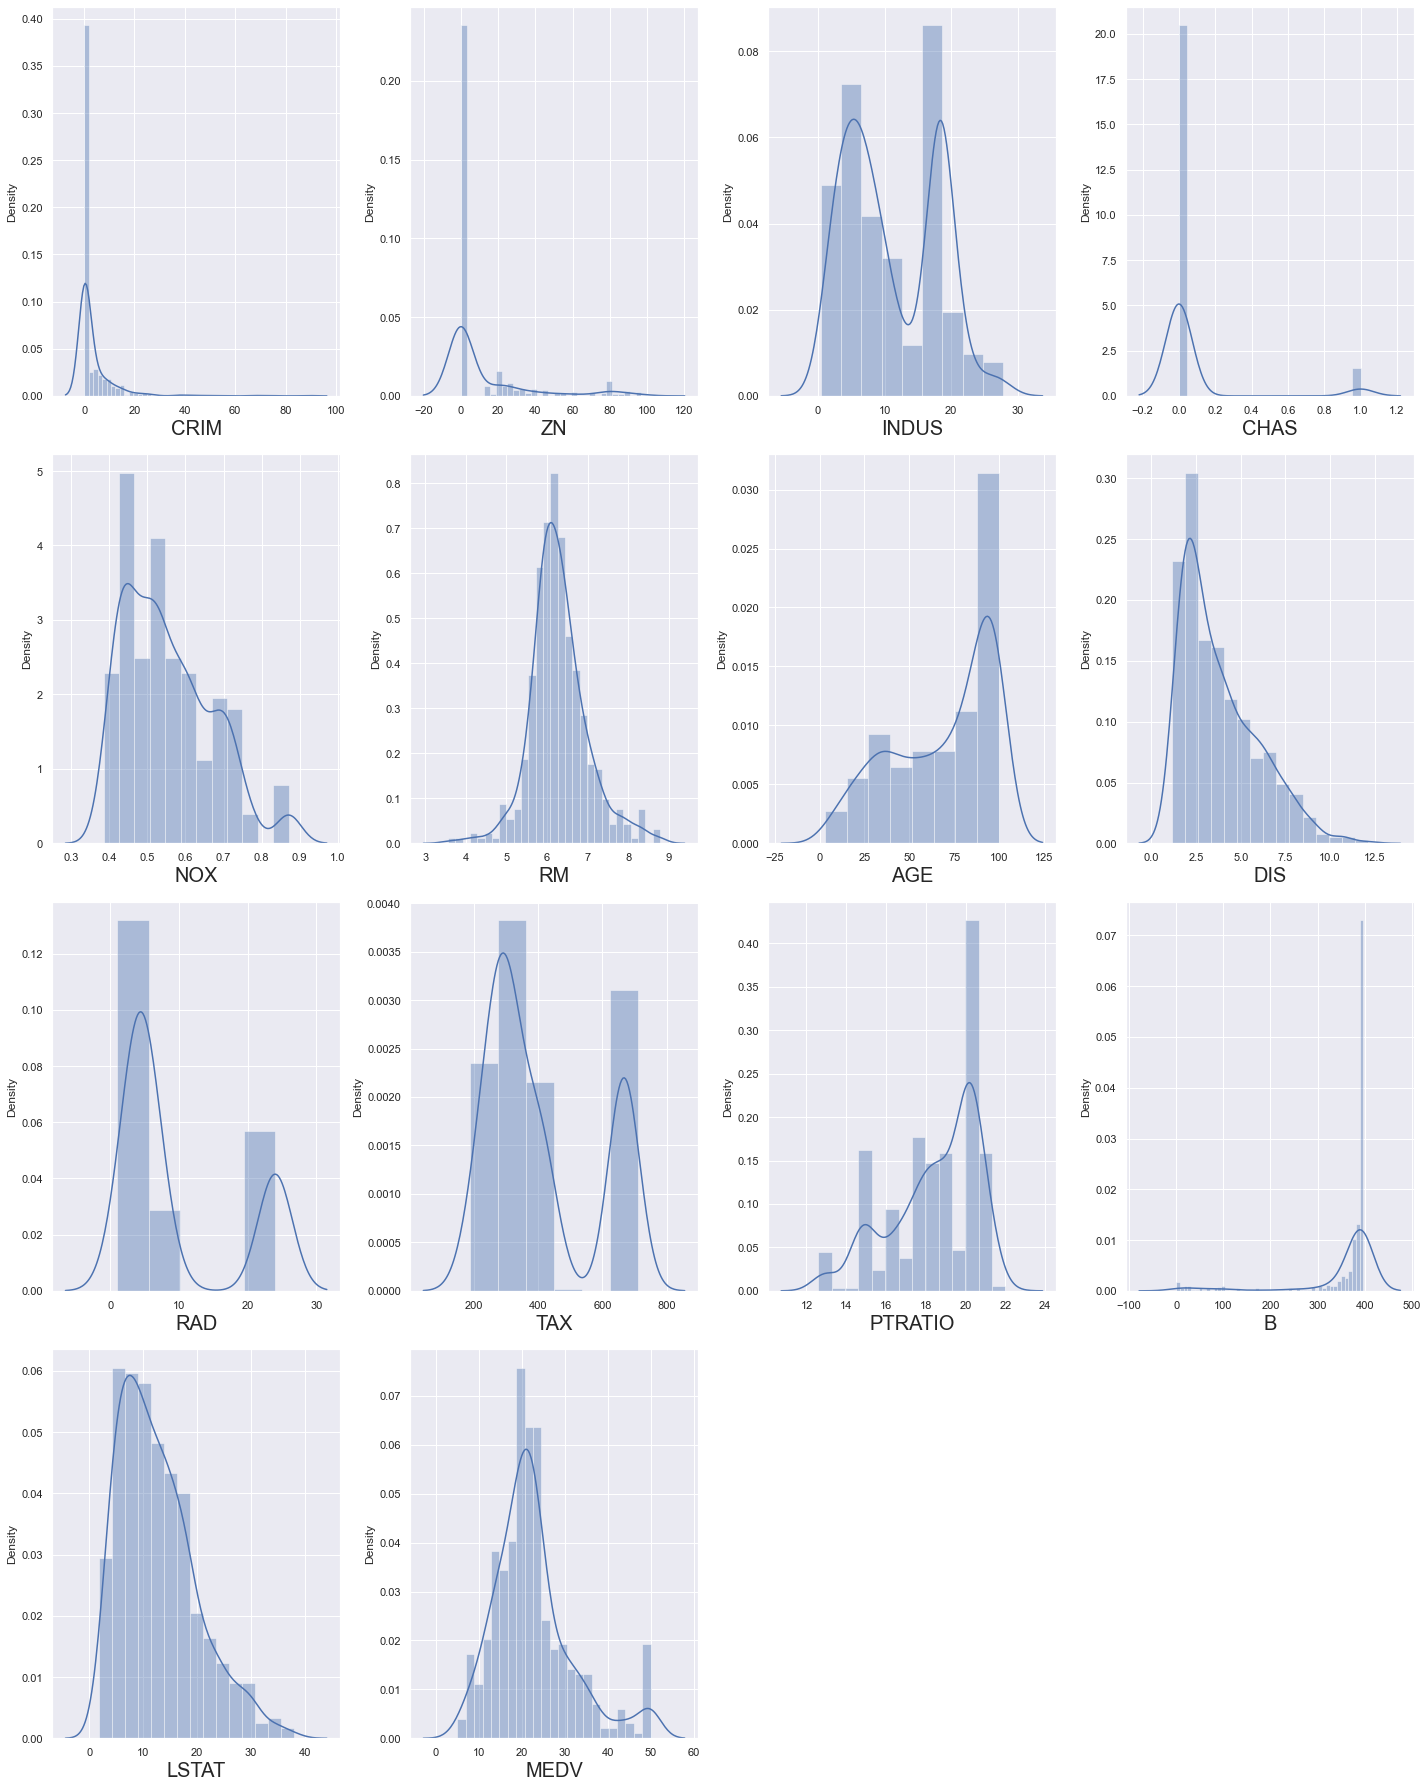

In [84]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos.columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

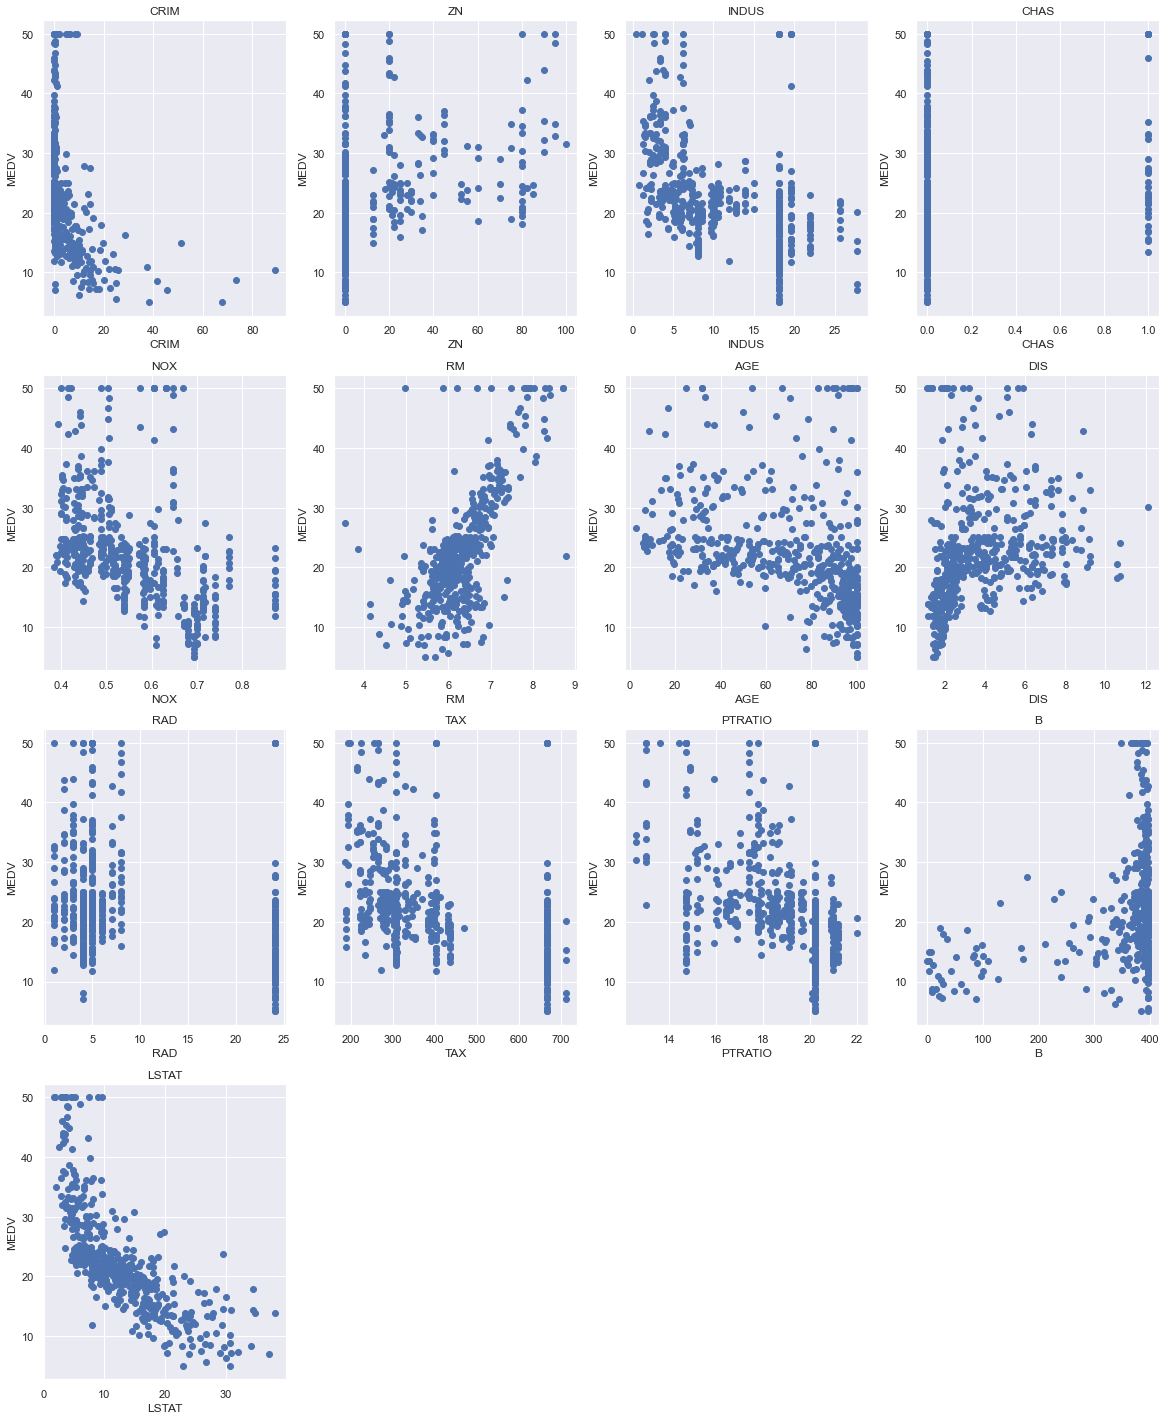

In [85]:
plt.figure(figsize=(20, 25))

features = bos.columns
target = boston.target

for i, col in enumerate(features):
    if col!= "MEDV":
        plt.subplot(4,4 , i+1)
        x = bos[col]
        y = target
        plt.scatter(x, y, marker='o')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('MEDV')

<AxesSubplot:>

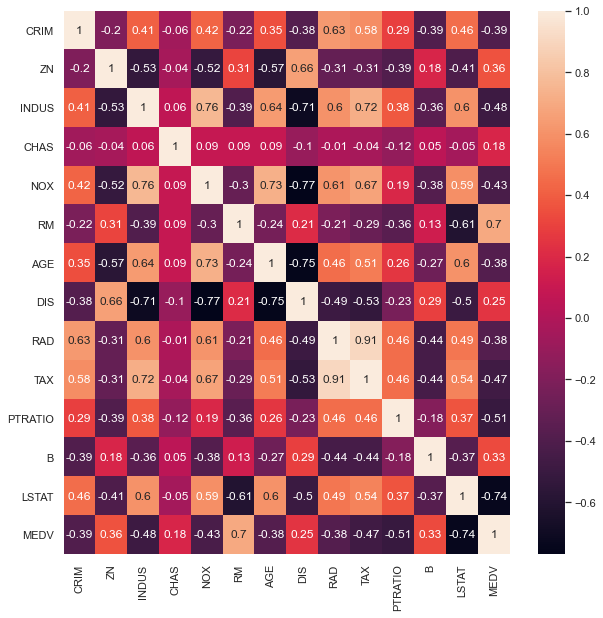

In [86]:
fig, ax = plt.subplots(figsize=(10,10))  
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,ax=ax)

## Observations

There are high postive correlation between RAD and TAX. Also negetive correlation in between DIS and AGE. We should not select both of these features together for training the model
In addtion to this there is high correlation with target feature PRICE with LSTAT and RM

In [87]:
# drop correlated features
bos.drop(columns=['TAX','AGE'], inplace=True)

# shape of dataframe
bos.shape

(506, 12)

### Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column.

### X and y arrays

In [88]:
X = bos.drop('MEDV',axis=1)
y = bos['MEDV']

In [89]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [91]:
vif

,VIF,Features
0,1.791924,CRIM
1,2.154351,ZN
2,3.225208,INDUS
3,1.055831,CHAS
4,4.054887,NOX
5,1.842095,RM
6,3.619789,DIS
7,2.817080,RAD
8,1.777184,PTRATIO
9,1.342218,B


## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [93]:
y_train

227    31.6
382    11.3
23     14.5
348    24.5
157    41.3
       ... 
291    37.3
501    22.4
346    17.2
130    19.2
254    21.9
Name: MEDV, Length: 379, dtype: float64

In [94]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## Creating and Training the Model

In [95]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
print(regression.intercept_)
print(regression.coef_)

22.50889229385476
[-0.861076    1.00608427 -0.69669261  1.00700748 -2.19497637  3.07659739
 -3.03865176  1.05155734 -1.95843506  0.81248325 -3.05405424]


In [97]:
regression.score(x_train,y_train)

0.7256533928796463

In [98]:
regression.score(x_test,y_test)

0.7476591735037927

In [99]:
adj_r2(x_train,y_train)

0.7174304700504259

In [100]:
adj_r2(x_test,y_test)

0.7235222248824165

In [108]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [103]:
regression.predict(scaler.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,396.90,4.98]]))

array([30.40989773])

In [104]:
pred = regression.predict(x_test)

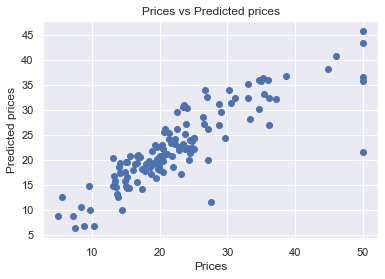

In [105]:
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Regression Evaluation Metrics

In [106]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.1502554000196588
MSE: 22.557803311225076
RMSE: 4.749505585976826


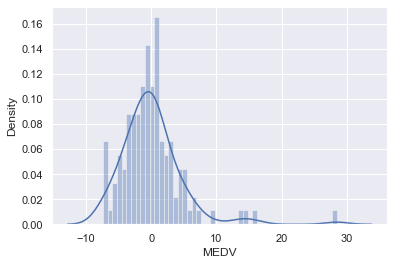

In [107]:
sns.distplot((y_test-pred),bins=50);